### [Linear Regression with Tensorflow 2](https://towardsdatascience.com/linear-regression-from-scratch-with-tensorflow-2-part-1-3e2443804df0)

In [219]:
# Import LIBs
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.3.0'

In [220]:
# Decalre inputs & labels
x_trains = [[73., 80., 75.], [93., 88., 93.],
           [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_trains = [[152.], [185.], [180.], [196.], [142.]]

In [221]:
# Declare W & b and set inital random values
W = tf.Variable(tf.random.normal([3, 1])) # weight
b = tf.Variable(tf.random.normal([1])) # bias

# for plot
global cost
cost = np.array([]) # costs, weight, bias

In [222]:
# Hypothesis: Linear regression H(X) = XW + b
def H(X):
  return tf.matmul(X, W) + b

In [223]:
# Cost(loss) function: Mean Square Error  Sum( ( H(x) - y )^2 ) / m
def mse(predicted, real):
  return tf.reduce_mean(tf.square(predicted - real))

In [224]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(x, y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    loss = mse(H(x), y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)

  # for plot
  global cost
  cost = np.append(cost, loss.numpy())

In [225]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    gd(x, y, learning_rate)

In [226]:
# run
train(x_trains, y_trains, 0.000001, 5000)
print('Model H(x) = {}x + {}'.format(W.numpy()[0], b.numpy()[0])) # W=2, b=0

Model H(x) = [0.46125835]x + -1.3853627443313599


cost: 2.063002586364746


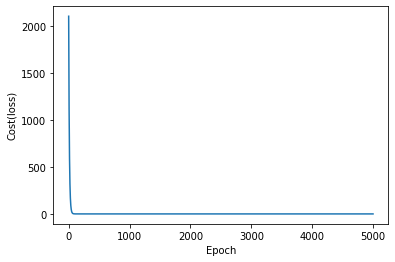

In [227]:
# cost logs
print('cost:', cost[len(cost)-1])
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Cost(loss)')
plt.show()